## All libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
marketing_data = pd.read_csv("marketing_campaign.csv")


## Adding Specific columns

In [5]:
marketing_data = marketing_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases',
                                 'NumWebVisitsMonth']]

In [6]:
marketing_data.head()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [7]:
marketing_data.shape


(2240, 11)

In [8]:
marketing_data.dtypes


,0
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64
NumDealsPurchases,int64
NumWebPurchases,int64
NumCatalogPurchases,int64
NumStorePurchases,int64


## Checking null values

In [9]:
marketing_data.isnull().sum()


,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0


No null value All columns shows 0 which means there is no null values

## Scaling Data

In [10]:
scaler = StandardScaler()
marketing_data_scaled = scaler.fit_transform(marketing_data)

We use StandardScaler for several important reasons in machine learning, especially before applying algorithms like KMeans clustering:

Algorithms sensitive to scale: Many machine learning algorithms, particularly distance-based ones like KMeans, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM), are sensitive to the scale of the input features. If one feature has a much larger range of values than another, it can dominate the distance calculations and skew the results. Scaling ensures that all features contribute roughly equally to the model.
Improved performance: Scaling can lead to faster convergence during training for some algorithms and generally improve the performance of many models.
Preventing bias: Without scaling, features with larger values might be considered more important by the algorithm, even if they are not inherently more informative. Scaling prevents this bias.

imported KMeans in next line, which is a clustering algorithm that relies on calculating distances between data points. Using StandardScaler on your marketing_data before applying KMeans will help ensure that the clustering is based on the actual patterns in the data, rather than being dominated by features with larger numerical values.

## KMean MODEL

In [11]:
kmeans = KMeans(n_clusters= 4, init='k-means++',random_state= 1)

kmeans.fit(marketing_data_scaled)

KMeans(n_clusters=4, random_state=1)

KMeans is a suitable choice for task because it can effectively group  customers into distinct segments based on their behavioral data, providing a foundation for targeted marketing efforts and a better understanding of your customer base.

n_clusters=4: Specifies that you want to group your data into 4 clusters.
init='k-means++': This is a smart initialization method that helps the algorithm converge faster and avoid getting stuck in local optima. It selects initial cluster centers that are far away from each other.
random_state=1: This sets a seed for the random number generator. Using a fixed random_state ensures that you get the same results each time you run the code, making your work reproducible.
kmeans.fit(marketing_data_scaled): This line trains the KMeans model using your scaled data (marketing_data_scaled). The fit() method performs the iterative process of finding the optimal cluster centers and assigning each data point to a cluster.

In [12]:
label = kmeans.fit_predict(marketing_data_scaled)
marketing_data_test = marketing_data.copy()
marketing_data_test['label'] = label
marketing_data_test['label'] = marketing_data_test['label'].astype(str)

,Marketing_data_test = marketing_data.copy(): This creates a copy of your original marketing_data DataFrame. It's good practice to work on a copy so that you don't accidentally modify your original data.
marketing_data_test['label'] = label: This adds a new column named 'label' to the marketing_data_test DataFrame and populates it with the cluster labels obtained from the kmeans.fit_predict() step.
marketing_data_test['label'] = marketing_data_test['label'].astype(str): This converts the data type of the 'label' column to a string. This is often done when you want to use the labels for plotting, as plotting libraries sometimes handle categorical data (like strings) differently than numerical data.
After executing this code, marketing_data_test will be a DataFrame containing your original marketing data along with a new column indicating which of the 4 clusters each customer belongs to. This DataFrame is now ready for further analysis or visualization of the clusters.

<Axes: xlabel='MntWines', ylabel='MntFruits'>

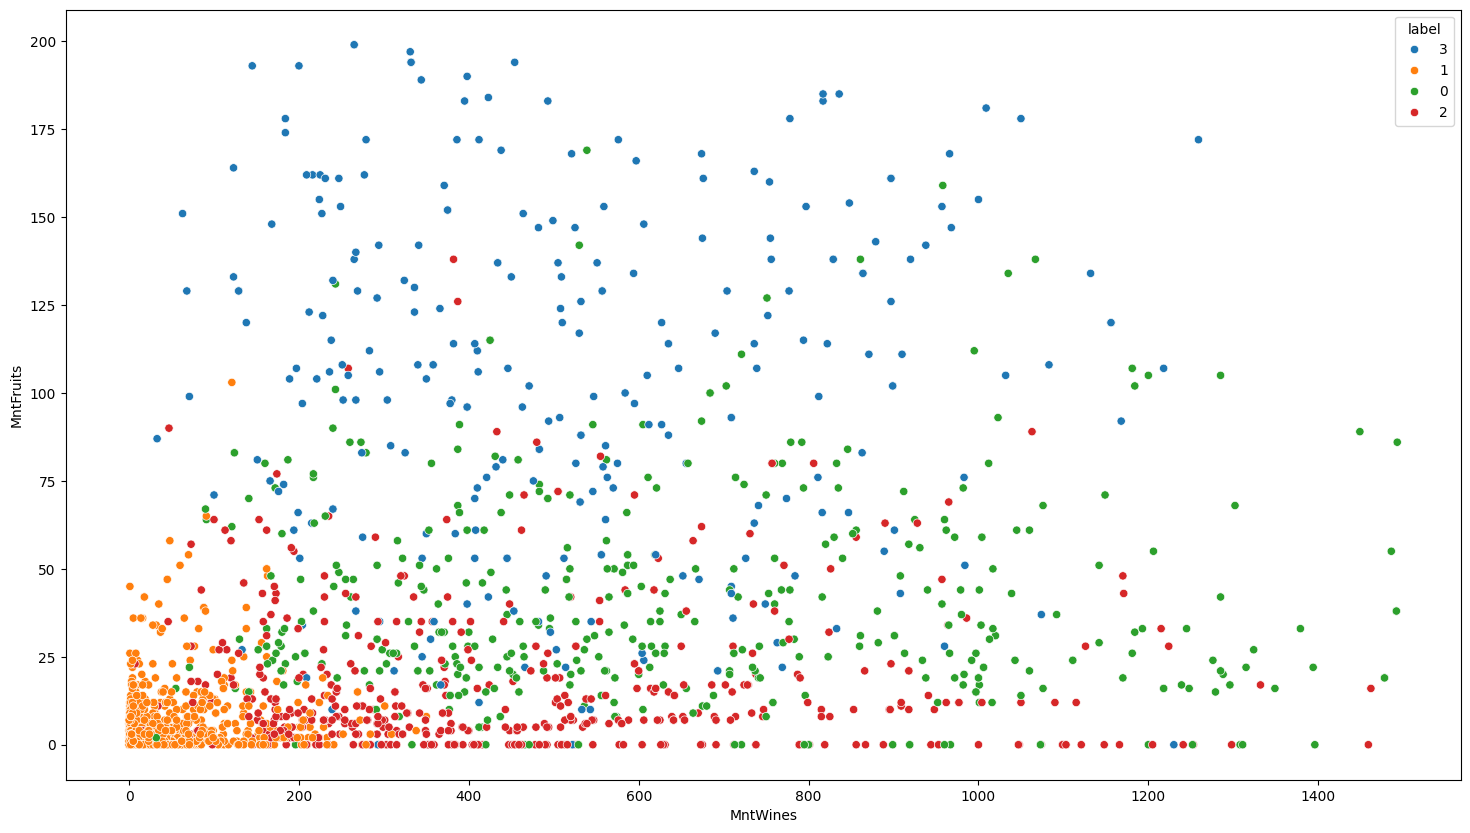

In [13]:
plt.figure(figsize= (18,10))
sns.scatterplot(x= marketing_data_test['MntWines'], y= marketing_data_test['MntFruits'], hue = marketing_data_test['label'])


Interpreting the Current Plot:

Observe the separation of colors: Look at how the different colored points (representing each cluster) are distributed. Do you see clear groupings? Are some clusters more distinct than others in terms of wine and fruit spending?
Characterize each cluster: Based on the visual separation, you can start to describe each cluster in terms of their typical spending on wines and fruits. For example, one cluster might represent customers who spend a lot on both, while another might spend very little on either.
Identify outliers: See if there are any points that seem far away from their assigned cluster's main group. These could be outliers that warrant further investigation.

The resulting plot will show you how your 4 customer segments are distributed based on their spending on wines and fruits. You'll be able to visually identify if there are distinct groupings in this 2-dimensional space.

In [14]:
marketing_data_output = marketing_data.copy()
marketing_data_output['cluster'] = label
marketing_data_output['cluster'].value_counts()

,count
cluster,
1,1048
2,493
0,421
3,278


Text(0, 0.5, 'Inertia')

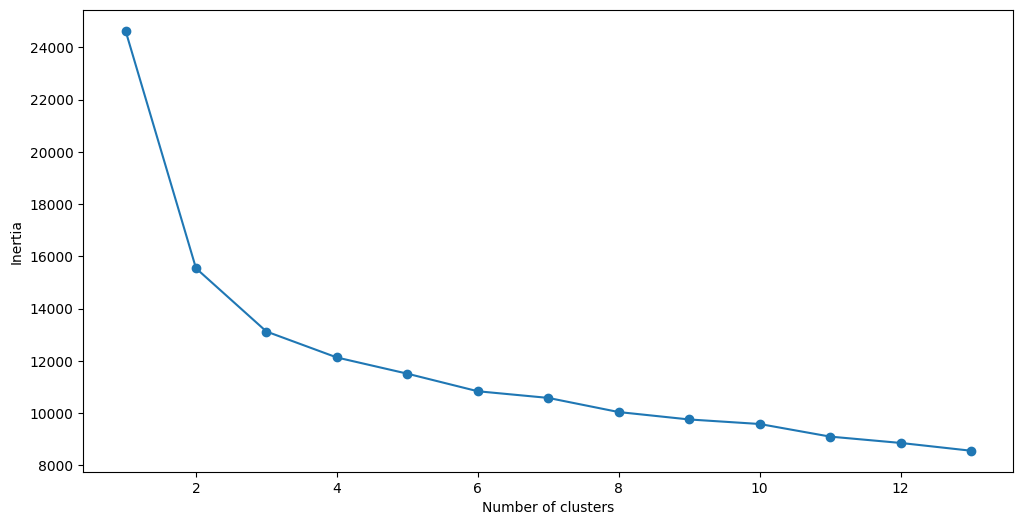

In [15]:
distance_values = []
for cluster in range(1,14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(marketing_data_scaled)
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({'Cluster':range(1,14), 'distance_values':distance_values})
plt.figure(figsize=(12,6))
plt.plot(cluster_output['Cluster'], cluster_output['distance_values'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Imagine you have a bunch of customers, and you want to group them into similar types. You're using a method called K-Means clustering to do this. But how do you know how many groups (clusters) you should create? That's what this code helps you figure out!

Here's what the code does step-by-step:

Try different numbers of groups: The code runs the K-Means clustering many times, each time trying a different number of groups (starting with 1 group all the way up to 13 groups).
Measure how "tight" the groups are: For each number of groups it tries, the code calculates something called "inertia." Think of inertia as a measure of how spread out the customers are within their assigned groups. A smaller inertia means the customers within each group are closer to each other, indicating tighter, better-defined groups.
Keep track of the "tightness" for each number of groups: The code saves the inertia value for each number of groups it tried.
Draw a picture: Finally, the code creates a plot (a graph). This plot shows you how the inertia (the "tightness") changes as you increase the number of groups.
What can you get from this picture?

This plot is called an "elbow plot." You look for a point on the plot where the line suddenly changes direction, like an elbow. This "elbow" point is often a good indication of the optimal number of clusters.

Why? Because before the elbow, adding more clusters significantly decreases the inertia (makes the groups much tighter). After the elbow, adding more clusters doesn't reduce the inertia as much, meaning you're not getting much additional benefit from creating more groups.

So, by looking at the elbow plot, you can visually see which number of clusters seems to create the best balance between having a reasonable number of groups and having those groups be well-defined and tight.

In short, this code helps you choose the best number of customer groups for your analysis by showing you how clear and distinct those groups are for different numbers of clusters.

##Profiling Clustters

In [16]:
cols  =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

In [17]:
overall_mean = marketing_data_output[cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean,columns =['overall_average'])
overall_mean

,overall_average
MntWines,303.935714
MntFruits,26.302232
MntMeatProducts,166.950000
MntFishProducts,37.525446
MntSweetProducts,27.062946
MntGoldProds,44.021875
NumDealsPurchases,2.325000
NumWebPurchases,4.084821
NumCatalogPurchases,2.662054
NumStorePurchases,5.790179


The output overall_mean DataFrame provides a summary of the typical customer behavior across all your data. You can see, for example, the average amount spent on wines, fruits, meat products, etc., and the average number of purchases through different channels or website visits per month for the entire customer base.

This overall average serves as a baseline. You can later compare the average values within each cluster to these overall averages to understand how each customer segment differs from the overall customer base. This helps in profiling and characterizing each cluster.

In [18]:
cluster_mean = marketing_data_output.groupby('cluster')[cols].mean().T
cluster_mean

cluster,0,1,2,3
MntWines,638.244656,43.962786,452.217039,514.744604
MntFruits,39.729216,5.224237,16.782961,102.309353
MntMeatProducts,416.928741,22.745229,120.651116,414.111511
MntFishProducts,71.420428,7.441794,22.632860,126.014388
MntSweetProducts,40.560570,5.287214,18.225152,104.384892
MntGoldProds,61.133017,15.206107,60.582150,97.370504
NumDealsPurchases,1.460808,1.903626,4.411765,1.521583
NumWebPurchases,5.004751,2.085878,6.553753,5.848921
NumCatalogPurchases,5.983373,0.581107,2.718053,5.377698
NumStorePurchases,8.581948,3.286260,7.271805,8.374101


marketing_data_output.groupby('cluster'): This groups the marketing_data_output DataFrame based on the 'cluster' column. This means that all the rows belonging to Cluster 0 will be grouped together, all rows for Cluster 1 will be grouped together, and so on.
[cols]: After grouping, this selects the columns listed in the cols variable for each group. These are the marketing features you want to analyze the averages for within each cluster.
.mean(): This calculates the mean (average) for each of the selected columns within each cluster group. So, you'll get the average spending on wines, fruits, etc., for the customers in Cluster 0, then for the customers in Cluster 1, and so on.
.T: This transposes the resulting table. By default, groupby().mean() would have the cluster labels as the index and the feature names as the columns. Transposing it makes the feature names the index and the cluster labels the columns, which is often a more convenient format for comparing the average values across clusters.
What you get from this output (cluster_mean DataFrame):

The cluster_mean DataFrame shows you the average value for each marketing feature for each of your identified clusters.

For example, you can see:

How the average spending on wines differs between Cluster 0, Cluster 1, Cluster 2, and Cluster 3.
How the average number of web purchases varies across the clusters.
How the average number of store purchases compares between the groups.
By comparing these average values for each feature across the different clusters, you can start to profile and characterize each customer segment. You can identify which clusters spend more on certain products, which ones prefer specific purchasing channels, or which ones visit the website more frequently.

Next Steps:

Now that you have the overall averages and the cluster-specific averages, a good next step would be to visualize these differences to make it easier to understand the profiles of each cluster. You could create bar plots or other visualizations to compare the average spending and purchase behaviors for each feature across the clusters.

In [19]:
pd.concat([cluster_mean,overall_mean],axis =1)


,0,1,2,3,overall_average
MntWines,638.244656,43.962786,452.217039,514.744604,303.935714
MntFruits,39.729216,5.224237,16.782961,102.309353,26.302232
MntMeatProducts,416.928741,22.745229,120.651116,414.111511,166.950000
MntFishProducts,71.420428,7.441794,22.632860,126.014388,37.525446
MntSweetProducts,40.560570,5.287214,18.225152,104.384892,27.062946
MntGoldProds,61.133017,15.206107,60.582150,97.370504,44.021875
NumDealsPurchases,1.460808,1.903626,4.411765,1.521583,2.325000
NumWebPurchases,5.004751,2.085878,6.553753,5.848921,4.084821
NumCatalogPurchases,5.983373,0.581107,2.718053,5.377698,2.662054
NumStorePurchases,8.581948,3.286260,7.271805,8.374101,5.790179


Concatinating Overall Average column wise with Cluster_mean

##PCA

In [20]:
pca_marketing = PCA(n_components=6,random_state = 1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)

PCA is a technique used to reduce the dimensionality of your data while retaining as much of the original variance (information) as possible. In simpler terms, it helps you summarize your data with fewer variables.

The output principalComponents_marketing is a NumPy array containing the data transformed into the 6 principal components. Instead of having 11 columns representing the original features, you now have 6 columns representing the principal components. Each row in this array corresponds to a customer, and the values in the columns are their scores on each of the principal components.

These principal components are ordered by the amount of variance they explain in the original data. The first principal component explains the most variance, the second the next most, and so on.

In [21]:
principal_marketing_data = pd.DataFrame(data = principalComponents_marketing
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])
principal_marketing_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,3.800461,0.572973,-1.254630,1.083547,0.274886,-2.368660
1,-2.175610,-0.928702,0.117578,0.292224,0.323580,0.105413
2,1.501507,0.123894,-0.096791,-0.992810,-1.071276,0.602728
3,-2.016701,-0.518668,-0.025703,0.070743,-0.181590,0.227872
4,-0.044173,0.763401,-0.238572,1.149119,-0.334696,0.495866
...,...,...,...,...,...,...
2235,2.660651,1.308848,-2.151732,-2.178308,1.453732,-0.526411
2236,-1.063664,2.738997,0.463307,0.821222,-0.336517,0.070777
2237,1.130411,0.004491,1.519866,-0.539346,-0.947537,0.493189
2238,1.749883,0.079894,0.509966,-0.305776,-0.035570,0.746510


What you get from this output (principal_marketing_data):

The output principal_marketing_data is a pandas DataFrame where each row represents a customer and each column represents one of the 6 principal components. The values in the cells are the scores of each customer on each principal component.

This DataFrame makes it easier to work with the PCA results. You can now easily access and manipulate the principal component scores for each customer.


In [22]:
for i in range(0,len(pca_marketing.explained_variance_ratio_)):
    print("Component ",i ," ",pca_marketing.explained_variance_ratio_[i])

Component  0   0.46456652843636415
Component  1   0.14052465457040472
Component  2   0.0751684438095131
Component  3   0.06144172878159479
Component  4   0.057146317009475735
Component  5   0.04743640914940627


This code iterates through the explained_variance_ratio_ attribute of the pca_marketing object. This attribute is a list where each element represents the proportion of variance explained by the corresponding principal component. The code then prints the component number (starting from 0) and its explained variance ratio. This helps you understand how much information (variance) each principal component captures from the original data.

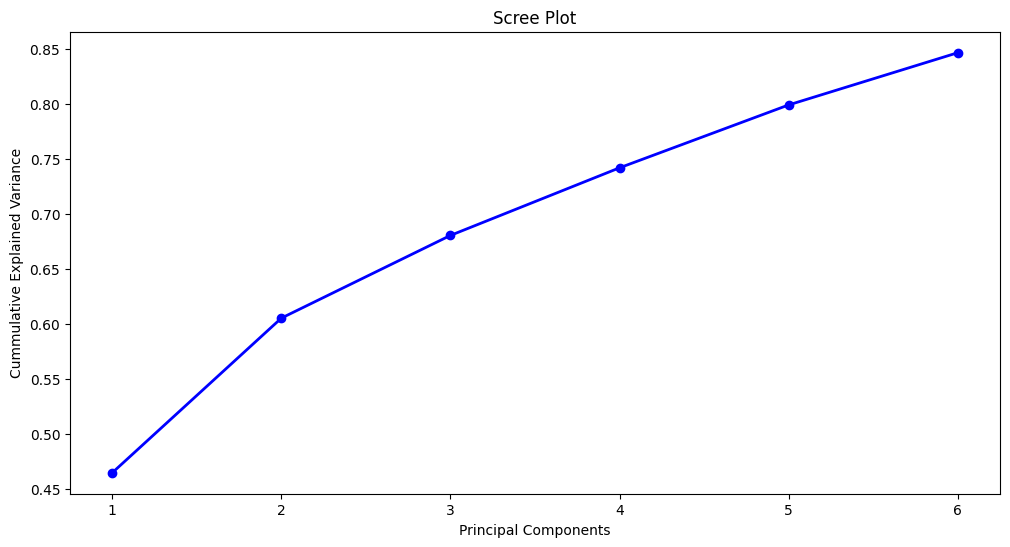

In [23]:
plt.figure(figsize= (12,6))

PC_values = np.arange(pca_marketing.n_components_) + 1
cummulative_variance = np.cumsum(pca_marketing.explained_variance_ratio_)
plt.plot(PC_values, cummulative_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.show()

X-axis (Principal Components): This axis represents the number of principal components, ordered from 1 up to the total number of components you calculated (in this case, 6).
Y-axis (Cumulative Explained Variance): This axis shows the cumulative proportion of the total variance in your original data that is explained by including the corresponding number of principal components.
What to look for:

The goal of a scree plot is to identify an "elbow point." This is the point on the graph where the curve sharply changes direction and then flattens out. The components before the elbow are generally considered to be the most important components to retain because they explain a significant amount of the variance in the data. After the elbow, each additional component explains much less additional variance, suggesting that retaining more components might not be adding much new information and could potentially lead to overfitting or make the analysis more complex without significant benefit.

In your specific plot, you can observe the cumulative explained variance increasing with each added component. To find the optimal number of components, you would look for where the increase in explained variance starts to significantly slow down. The point where this happens suggests a reasonable number of components to keep, as those components capture the majority of the data's variability.

Based on your plot, you can see the cumulative variance increases rapidly for the first few components and then the rate of increase slows down. The "elbow" appears to be somewhere around the 2nd or 3rd principal component. This suggests that keeping 2 or 3 principal components might be a good choice as they explain a substantial amount of the variance in your data while significantly reducing the dimensionality from the original 11 features.

In [27]:
loadings_df = pd.DataFrame(pca_marketing.components_).T
loadings_df = loadings_df.set_index(marketing_data.columns)
loadings_df

,0,1,2,3,4,5
MntWines,0.327941,0.222837,0.435535,-0.208662,-0.087749,-0.243052
MntFruits,0.323026,-0.130151,-0.376355,0.140996,-0.224386,0.012065
MntMeatProducts,0.354452,-0.130388,0.209744,0.305524,0.151587,-0.354552
MntFishProducts,0.333163,-0.142444,-0.345355,0.150907,-0.049328,-0.050934
MntSweetProducts,0.321179,-0.104676,-0.363038,0.115690,-0.350306,-0.047819
MntGoldProds,0.265813,0.189065,-0.405995,-0.416516,0.693513,0.128306
NumDealsPurchases,-0.042299,0.636331,-0.077169,0.661013,0.144609,0.268801
NumWebPurchases,0.245131,0.493262,-0.039387,-0.358028,-0.270322,-0.161445
NumCatalogPurchases,0.360813,0.009298,0.269517,0.235563,0.316932,-0.252435
NumStorePurchases,0.329634,0.187143,0.241080,-0.112152,-0.297203,0.574865


In [28]:
loadings_df.where(abs(loadings_df) >= 0.35)


,0,1,2,3,4,5
MntWines,NaN,NaN,0.435535,NaN,NaN,NaN
MntFruits,NaN,NaN,-0.376355,NaN,NaN,NaN
MntMeatProducts,0.354452,NaN,NaN,NaN,NaN,-0.354552
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,-0.363038,NaN,-0.350306,NaN
MntGoldProds,NaN,NaN,-0.405995,-0.416516,0.693513,NaN
NumDealsPurchases,NaN,0.636331,NaN,0.661013,NaN,NaN
NumWebPurchases,NaN,0.493262,NaN,-0.358028,NaN,NaN
NumCatalogPurchases,0.360813,NaN,NaN,NaN,NaN,NaN
NumStorePurchases,NaN,NaN,NaN,NaN,NaN,0.574865


abs(loadings_df) calculates the absolute value of each loading in the DataFrame. This is because a feature can have a strong positive or negative influence on a principal component.
>= 0.35 sets a threshold. Any loading with an absolute value less than 0.35 will be replaced with NaN (Not a Number). Loadings with an absolute value greater than or equal to 0.35 will be kept.
What you get from this output:

The resulting DataFrame shows you only the loadings that have an absolute value of 0.35 or greater. This is a common technique to highlight the features that contribute most significantly to each principal component. By setting a threshold, you can more easily identify which original features are driving the variance captured by each principal component.

For example, if you see a value in the first column (Principal Component 0) that is not NaN, it means that the corresponding feature has a strong influence on the first principal component. This helps you understand what each principal component represents in terms of your original marketing data.

## Installing Factor Analyzer

In [30]:
%pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=944c6a87d91fed0d40cfd64dce35fb3d6ccde5110f5cbca3669ba8090620d52b
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


## Importing Factor Analyzer Libraries

In [32]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [33]:
satisfaction_data = pd.read_csv("website_survey.csv")


In [34]:
satisfaction_data = satisfaction_data[['q1', 'q2', 'q3','q4', 'q5', 'q6', 'q7', 'q8', 'q9',
                                       'q10', 'q11', 'q12', 'q13', 'q14','q15', 'q16', 'q17',
                                       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24','q25', 'q26']]

this code is filtering the satisfaction_data DataFrame to keep only the columns named 'q1' through 'q26'. It's likely you're focusing on these specific survey questions for your analysis.

In [35]:
satisfaction_data.head()


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,9,7,6,6,7,7,6,6,5,5,...,8,4,6,5,6,6,5,2,5,3
1,10,10,10,9,10,10,10,10,9,10,...,10,10,10,10,10,10,10,10,9,8
2,10,10,10,10,10,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
3,5,8,5,5,5,5,5,6,6,8,...,7,9,10,8,8,10,10,8,10,6
4,9,10,9,10,9,7,8,5,7,8,...,7,8,8,8,9,9,10,10,10,10


In [36]:
satisfaction_data.shape


(73, 26)

## Checking Data Type

In [37]:
satisfaction_data.dtypes


,0
q1,int64
q2,int64
q3,int64
q4,int64
q5,int64
q6,int64
q7,int64
q8,int64
q9,int64
q10,int64


## Checking null values

In [38]:
satisfaction_data.isnull().sum()


,0
q1,0
q2,0
q3,0
q4,0
q5,0
q6,0
q7,0
q8,0
q9,0
q10,0


In [39]:
satisfaction_data.corr()


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,1.000000,0.732557,0.601434,0.566234,0.607621,0.370763,0.459210,0.333309,0.033092,0.069668,...,0.323691,0.280609,0.279557,0.434450,0.460769,0.373225,0.200752,0.213424,0.287148,0.226838
q2,0.732557,1.000000,0.593326,0.739373,0.628895,0.246588,0.349147,0.380736,0.192304,0.258513,...,0.383603,0.297904,0.382702,0.529213,0.522291,0.425659,0.326854,0.240745,0.388849,0.339132
q3,0.601434,0.593326,1.000000,0.647676,0.552131,0.172054,0.308335,0.420688,0.187925,0.157351,...,0.387370,0.341007,0.295327,0.409462,0.497751,0.308314,0.098932,0.238922,0.295704,0.179385
q4,0.566234,0.739373,0.647676,1.000000,0.593274,0.179106,0.218992,0.378380,0.071463,0.149129,...,0.299033,0.308255,0.408938,0.436496,0.489926,0.341183,0.240013,0.241790,0.358909,0.239614
q5,0.607621,0.628895,0.552131,0.593274,1.000000,0.480150,0.500265,0.481930,0.329357,0.273870,...,0.511105,0.367275,0.420468,0.497811,0.471196,0.471106,0.385919,0.357058,0.466934,0.350171
q6,0.370763,0.246588,0.172054,0.179106,0.480150,1.000000,0.666100,0.701205,0.388504,0.437400,...,0.605565,0.247161,0.413837,0.537055,0.481797,0.595427,0.470235,0.429972,0.443095,0.474170
q7,0.459210,0.349147,0.308335,0.218992,0.500265,0.666100,1.000000,0.510057,0.350293,0.307583,...,0.666361,0.448136,0.513304,0.562642,0.508320,0.633145,0.498880,0.535975,0.544221,0.567023
q8,0.333309,0.380736,0.420688,0.378380,0.481930,0.701205,0.510057,1.000000,0.479199,0.482602,...,0.644112,0.450204,0.534457,0.622011,0.647805,0.627109,0.434245,0.434191,0.490195,0.470124
q9,0.033092,0.192304,0.187925,0.071463,0.329357,0.388504,0.350293,0.479199,1.000000,0.568667,...,0.410685,0.479387,0.441629,0.558843,0.510781,0.500321,0.468448,0.417570,0.443989,0.514908
q10,0.069668,0.258513,0.157351,0.149129,0.273870,0.437400,0.307583,0.482602,0.568667,1.000000,...,0.438689,0.447040,0.518413,0.526933,0.390390,0.500343,0.520452,0.446936,0.501505,0.498620


What you get from this output:

The output is a correlation matrix, which is a table showing the correlation coefficient between each pair of variables (in this case, your survey questions).

Correlation Coefficient: This value ranges from -1 to +1.
A value close to +1 indicates a strong positive linear correlation (as one variable increases, the other tends to increase).
A value close to -1 indicates a strong negative linear correlation (as one variable increases, the other tends to decrease).
A value close to 0 indicates a weak or no linear correlation.
The diagonal of the matrix will always be 1, as a variable is perfectly correlated with itself.
By examining this correlation matrix, you can see how strongly each survey question is related to every other survey question. This can help you identify questions that are measuring similar underlying concepts or those that are relatively independent of each other. This is a common step before performing techniques like Factor Analysis, as highly correlated variables can often be grouped together into underlying factors.

In [40]:
satisfaction_data.corr()[(satisfaction_data.corr()>0.9) & (satisfaction_data.corr()<1)]


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What you get from this output:

The resulting DataFrame shows you only the correlation coefficients that are greater than 0.9 (and not equal to 1). All other correlation values are replaced with NaN.

This is a way to quickly identify pairs of variables (survey questions) that are very highly positively correlated with each other. A correlation coefficient above 0.9 suggests a very strong linear relationship. In the context of a survey, this might indicate that these questions are essentially measuring the same underlying construct or are redundant.

Based on your output, since the resulting DataFrame is filled with NaN values, it means there are no pairs of survey questions in your data that have a correlation coefficient greater than 0.9 (excluding the diagonal of 1). This suggests that while some questions may be correlated, none are extremely highly correlated to the point of being almost identical measures.

##Applying Factor Analyzer

In [42]:
fa = FactorAnalyzer(n_factors = 6, rotation="varimax")
fa.fit(satisfaction_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

this code is setting up and running a Factor Analysis model to identify 6 underlying factors within your survey data, using a Varimax rotation to make the results more interpretable. The fit() method is where the analysis is actually performed.

In [43]:
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])


,0,1,2,3,4,5
Variance,4.480893,3.972976,3.338380,3.249583,1.878286,1.542127
Proportional Var,0.172342,0.152807,0.128399,0.124984,0.072242,0.059313
Cumulative Var,0.172342,0.325149,0.453548,0.578532,0.650774,0.710086


What you get from this output:

The resulting DataFrame provides a summary of how much of the total variance in your survey data is explained by each of the 6 factors you extracted.

Variance (Eigenvalue): The first row shows the eigenvalue for each factor. Factors with eigenvalues greater than 1 are generally considered significant (this is a common criterion, though not the only one).
Proportional Var: The second row shows the proportion of the total variance explained by each factor. For example, the first factor explains about 17.2% of the total variance, the second explains about 15.3%, and so on.
Cumulative Var: The third row shows the cumulative proportion of variance explained. This is particularly useful for determining how many factors are needed to explain a desired amount of variance. In your output, the cumulative variance for 6 factors is 0.710086, meaning that these 6 factors together explain about 71% of the total variance in your original 26 survey questions.
This output helps you assess the effectiveness of your Factor Analysis. You can see how much of the information in your original data is captured by the extracted factors and decide if extracting 6 factors was an appropriate choice based on the cumulative explained variance.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


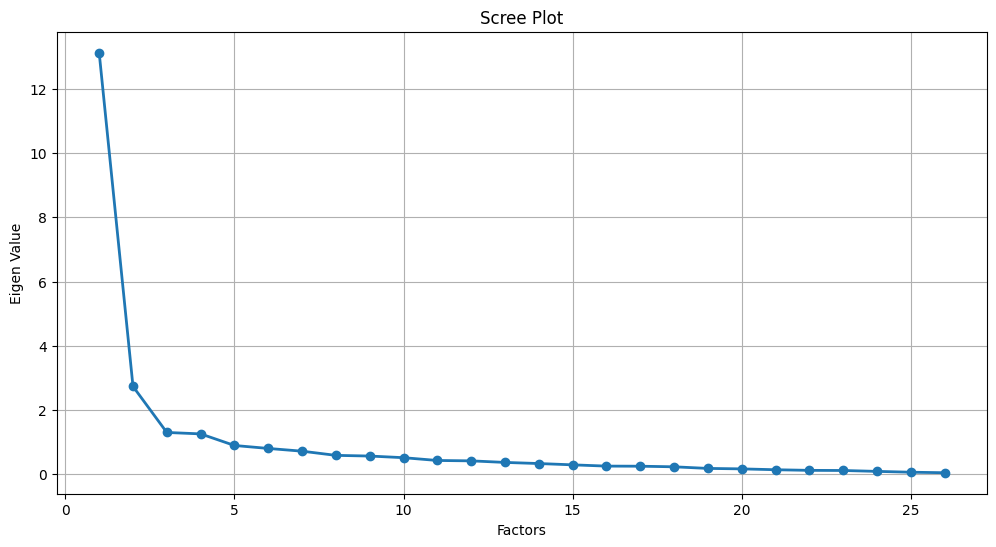

In [44]:
fa = FactorAnalyzer(rotation = 'varimax',n_factors=satisfaction_data.shape[1])
fa.fit(satisfaction_data)
ev,_ = fa.get_eigenvalues()

factor_values = np.arange(satisfaction_data.shape[1]) + 1

plt.figure(figsize= (12,6))

plt.plot(factor_values,ev,'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

What you get from this plot:

The scree plot in Factor Analysis is similar in concept to the one in PCA.

X-axis (Factors): This represents the number of factors extracted, from 1 to 26.
Y-axis (Eigen Value): This represents the eigenvalue associated with each factor.
How to interpret the scree plot for Factor Analysis:

You are looking for the "elbow" point in the plot. This is where the curve sharply changes direction and then levels off. The factors before the elbow are generally considered to be the most significant factors to retain because they have eigenvalues greater than 1 and explain a substantial amount of the variance in the data. Factors after the elbow typically have eigenvalues less than 1 and explain much less additional variance. Retaining factors after the elbow may not add much meaningful information and can make the interpretation more complex.

Based on plot, you can see a steep drop in eigenvalues after the first few factors, and the curve starts to level off around 5 or 6 factors. This suggests that retaining 5 or 6 factors might be a reasonable choice based on the scree plot criterion.



##Analyise the factor

In [45]:
loadings_output = pd.DataFrame(fa.loadings_,index=satisfaction_data.columns)
loadings_output

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
q1,0.068818,0.696690,-0.051463,0.195801,0.051072,0.038587,-0.068238,0.096500,0.185021,-0.011705,...,0.038451,0.018246,0.003008,0.019400,0.001267,-0.002858,-0.008568,0.003342,-0.000031,0.0
q2,0.141453,0.897486,0.134230,0.042409,0.090884,0.087471,0.099691,0.002742,0.100812,-0.031976,...,0.049407,0.028455,0.018131,-0.003461,-0.007726,-0.021201,0.050596,0.137114,0.003854,0.0
q3,0.019293,0.585635,0.026384,0.073374,0.057910,0.120907,0.075937,0.117699,0.066161,0.036027,...,-0.015396,0.019286,0.019060,0.001276,-0.002658,-0.000165,0.004258,-0.001668,-0.000901,0.0
q4,0.118057,0.849785,-0.000151,0.082408,0.145539,0.052960,-0.080545,0.117180,-0.071489,0.126640,...,0.031048,-0.006313,0.017162,0.025340,0.018982,0.030796,-0.044492,-0.160690,-0.002886,0.0
q5,0.164051,0.555784,0.159341,0.232860,0.065602,0.121643,0.110555,0.085780,0.138560,0.022308,...,0.022138,0.025366,0.032478,0.007207,-0.004936,-0.007771,0.001023,-0.001856,0.000402,0.0
q6,0.240294,0.091424,0.192881,0.865289,0.089018,0.098073,0.080370,-0.031800,0.233134,0.080864,...,0.001630,0.035906,0.001966,0.020732,0.001737,0.015406,-0.099021,-0.013948,-0.001529,0.0
q7,0.348092,0.157265,0.043013,0.363315,0.135645,0.090993,0.061646,0.159676,0.711942,0.077285,...,0.079020,0.058576,0.029484,0.016810,0.005459,-0.001169,0.001298,0.004297,0.000209,0.0
q8,0.199582,0.236100,0.206505,0.638014,0.177260,0.109491,0.156561,0.206485,0.006538,0.033486,...,0.133846,0.040835,0.046904,0.001566,0.004800,-0.017264,0.210705,0.024608,0.003712,0.0
q9,0.256176,-0.004165,0.351253,0.164841,0.115143,0.024989,0.774798,0.183076,0.048130,0.144127,...,0.038451,-0.013807,0.009782,0.012553,0.004267,0.004693,0.005995,0.002826,0.000098,0.0
q10,0.279639,0.066462,0.712400,0.205849,0.167579,0.187433,0.198089,0.163011,0.007507,0.028988,...,0.015371,0.027126,0.029191,-0.032539,-0.056277,0.241270,-0.007582,-0.011175,0.002688,0.0


The resulting DataFrame (loadings_output) is a crucial output of Factor Analysis. It shows you the factor loadings, which are the correlations between each original variable (survey question) and each extracted factor.

By examining the loadings for each factor, you can interpret what each factor represents. You look for variables that have high absolute loadings on a particular factor and try to find a common theme or concept that those variables are measuring. For example, if questions about website ease of navigation, website speed, and finding information quickly all have high loadings on Factor 1, you might interpret Factor 1 as representing "Website Usability."

In [46]:
loadings_output.where(abs(loadings_output) > 0.5)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
q1,NaN,0.696690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,NaN,0.897486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,NaN,0.585635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,NaN,0.849785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5,NaN,0.555784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q6,NaN,NaN,NaN,0.865289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711942,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q8,NaN,NaN,NaN,0.638014,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q9,NaN,NaN,NaN,NaN,NaN,NaN,0.774798,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q10,NaN,NaN,0.712400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What you get from this output:

The resulting DataFrame shows you only the factor loadings that have an absolute value greater than 0.5. All other loadings are replaced with NaN.

This makes it much easier to identify which variables (survey questions) have a significant relationship with which factors. By looking at the non-NaN values in each column (each factor), you can see which questions "load" strongly onto that factor. This is crucial for the interpretation phase of Factor Analysis, where you try to name or describe the underlying concept that each factor represents based on the variables that load highly on it.

For example, if Factor 1 shows non-NaN values for questions related to website design and ease of use, you might conclude that Factor 1 represents "Website Aesthetics and Navigation."



In [47]:
pd.DataFrame(fa.get_communalities(),index=satisfaction_data.columns,columns=['Communalities'])


,Communalities
q1,0.962912
q2,0.940892
q3,0.954999
q4,0.924792
q5,0.949861
q6,0.995002
q7,0.934643
q8,0.832369
q9,0.929373
q10,0.847041


What you get from this output:

The resulting DataFrame shows the communalities for each survey question.

Communality: In Factor Analysis, the communality of a variable is the proportion of its variance that is explained by the common factors. It represents how much of the variability in a single survey question is accounted for by the underlying factors you've extracted.
Communalities range from 0 to 1.
A communality close to 1 means that almost all of the variance in that variable is explained by the factors. This suggests the variable is well-represented by the common factors and is closely related to the underlying constructs.
A communality close to 0 means that very little of the variance in that variable is explained by the factors. This suggests the variable is largely independent of the extracted factors and might be measuring something unique or is not well-explained by the common underlying constructs.
Looking at your output, most of the communalities are quite high (close to 1), which indicates that the extracted factors do a good job of explaining the variance in most of your survey questions. This is a positive sign for your Factor Analysis, suggesting that the chosen number of factors is capturing a significant portion of the information in your data.